In [1]:
import os

In [2]:
os.environ['LOG_LEVEL'] = 'INFO'

In [3]:
import time 

from IPython.display import display
import pandas
import seaborn
from matplotlib import pyplot

from nba_mvp_predictor import scrappers

In [4]:
scrapper = scrappers.BasketballReferenceScrapper()

In [5]:
#years = range(2000, 2023)
years = range(1977, 2023)

In [6]:
# Median of the ration played games / total games accross teams = 50%.
half_season_dates = {
    1977: {'day':17, 'month':1},
    1978: {'day':17, 'month':1},
    1979: {'day':11, 'month':1},
    1980: {'day':6, 'month':1},
    1981: {'day':5, 'month':1},
    1982: {'day':23, 'month':1},
    1983: {'day':22, 'month':1},
    1984: {'day':21, 'month':1}, 
    1985: {'day':20, 'month':1},
    1986: {'day':20, 'month':1},
    1987: {'day':25, 'month':1},
    1988: {'day':30, 'month':1},
    1989: {'day':28, 'month':1},
    1990: {'day':27, 'month':1},
    1991: {'day':24, 'month':1},
    1992: {'day':23, 'month':1},
    1993: {'day':28, 'month':1},
    1994: {'day':28, 'month':1},
    1995: {'day':28, 'month':1},
    1996: {'day':27, 'month':1},
    1997: {'day':24, 'month':1},
    1998: {'day':25, 'month':1},
    1999: {'day':21, 'month':3},
    2000: {'day':25, 'month':1},
    2001: {'day':23, 'month':1},
    2002: {'day':22, 'month':1},
    2003: {'day':22, 'month':1},
    2004: {'day':20, 'month':1},
    2005: {'day':25, 'month':1},
    2006: {'day':25, 'month':1},
    2007: {'day':22, 'month':1},
    2008: {'day':22, 'month':1},
    2009: {'day':20, 'month':1},
    2010: {'day':20, 'month':1},
    2011: {'day':18, 'month':1},
    2012: {'day':22, 'month':2},
    2013: {'day':21, 'month':1},
    2014: {'day':20, 'month':1},
    2015: {'day':18, 'month':1},
    2016: {'day':16, 'month':1},
    2017: {'day':16, 'month':1},
    2018: {'day':10, 'month':1},
    2019: {'day':10, 'month':1},
    2020: {'day':29, 'month':12, 'year':2019},
    2021: {'day':10, 'month':3},
    2022: {'day':11, 'month':1},
}
default_half_season_month = 1
default_half_season_day = 20

In [7]:
dfs = []
rename_cols = {'CONF_RANK' : 'Conference standing', 'W/L%' : 'Win %'}
keep_cols = ['Win %', 'Conference standing']
suffixes = (' at half season', ' at the end of the season')
ratio_games_played_at_half_season = []
for year in years:
    print(f'Loading standings for year {year}...')
    try:
        half_season_day = half_season_dates[year]['day']
        half_season_month = half_season_dates[year]['month']
    except KeyError:
        half_season_day = default_half_season_day
        half_season_month = default_half_season_month
        print(f'Using default half season date for year {year}')
    try:
        half_season_year = half_season_dates[year]['year']
    except KeyError:
        half_season_year = year
    time.sleep(2)
    half_season_data = scrapper.get_team_standings_on_date(half_season_day, half_season_month, half_season_year)
    time.sleep(2)
    
    #full_season_data = scrapper.get_team_standings_on_date(end_season_day, end_season_month, year)
    full_season_data = scrapper.get_team_standings([year])
    full_season_data = full_season_data.set_index('TEAM', drop=True)

    games_played_at_half_season = (half_season_data['W'] + half_season_data['L']).median()
    games_played_at_full_season = (full_season_data['W'] + full_season_data['L']).median()

    half_season_data = half_season_data.rename(columns=rename_cols)
    full_season_data = full_season_data.rename(columns=rename_cols)
    half_season_data = half_season_data[keep_cols]
    full_season_data = full_season_data[keep_cols]
    all_data = half_season_data.merge(full_season_data, how='inner', left_index=True, right_index=True, suffixes=suffixes)
    all_data['Season'] = year
    all_data['Team']  = all_data.index
    all_data = all_data.set_index(['Team', 'Season'], drop=True)
    dfs.append(all_data)
    ratio_games_played_at_half_season.append(
        f'{year} :' + '{:.0%}'.format(games_played_at_half_season/games_played_at_full_season)
    )
all_years_data = pandas.concat(
    dfs, join="outer", axis="index", ignore_index=False
)
print('% of games played at the chosen half season date:', ', '.join(ratio_games_played_at_half_season))

Loading standings for year 1977...
Loading standings for year 1978...
Loading standings for year 1979...
Loading standings for year 1980...
Loading standings for year 1981...
Loading standings for year 1982...
Loading standings for year 1983...
Loading standings for year 1984...
Loading standings for year 1985...
Loading standings for year 1986...
Loading standings for year 1987...
Loading standings for year 1988...
Loading standings for year 1989...
Loading standings for year 1990...
Loading standings for year 1991...
Loading standings for year 1992...
Loading standings for year 1993...
Loading standings for year 1994...
Loading standings for year 1995...
Loading standings for year 1996...
Loading standings for year 1997...
Loading standings for year 1998...
Loading standings for year 1999...
Loading standings for year 2000...
Loading standings for year 2001...
Loading standings for year 2002...
Loading standings for year 2003...
Loading standings for year 2004...
Loading standings fo

In [8]:
all_years_data.sample(3)

,,Win % at half season,Conference standing at half season,Win % at the end of the season,Conference standing at the end of the season
Team,Season,,,,
GSW,1977,0.525,6,0.561,4
SAC,1997,0.429,7,0.415,9
CHI,1979,0.415,9,0.378,11


In [9]:
delta_suffix = ' variation'
for col in keep_cols:
    all_years_data[f'{col}{delta_suffix}'] = all_years_data[f'{col}{suffixes[1]}'] - all_years_data[f'{col}{suffixes[0]}']

In [10]:
top_n = 10
for col in keep_cols:
    show_cols = [f'{col}{suffixes[0]}', f'{col}{suffixes[1]}', f'{col}{delta_suffix}']
    print(f'Top {top_n} increases in {col} since {min(years)}')
    top = all_years_data.sort_values(by=f'{col}{delta_suffix}', ascending=False).head(top_n)[show_cols]
    display(top)

Top 10 increases in Win % since 1977


,,Win % at half season,Win % at the end of the season,Win % variation
Team,Season,,,
MIA,2017,0.268,0.500,0.232
DEN,2005,0.415,0.598,0.183
NYK,1983,0.366,0.537,0.171
UTA,2018,0.415,0.585,0.170
IND,1994,0.410,0.573,0.163
PHI,2007,0.268,0.427,0.159
NJN,1999,0.167,0.320,0.153
CLE,1985,0.289,0.439,0.150
LAL,2003,0.463,0.610,0.147


Top 10 increases in Conference standing since 1977


,,Conference standing at half season,Conference standing at the end of the season,Conference standing variation
Team,Season,,,
MIL,2002,2,9,7
UTA,2011,4,11,7
CLE,2005,3,9,6
CHI,2016,3,9,6
WAS,2007,1,7,6
LAL,2005,6,12,6
MIN,2007,8,13,5
ATL,2014,3,8,5
ORL,2005,5,10,5


In [11]:
top_n = 10
for col in keep_cols:
    show_cols = [f'{col}{suffixes[0]}', f'{col}{suffixes[1]}', f'{col}{delta_suffix}']
    print(f'Top {top_n} decreases in {col} since {min(years)}')
    top = all_years_data.sort_values(by=f'{col}{delta_suffix}', ascending=True).head(top_n)[show_cols]
    display(top)

Top 10 decreases in Win % since 1977


,,Win % at half season,Win % at the end of the season,Win % variation
Team,Season,,,
UTA,2011,0.659,0.476,-0.183
CHI,2022,0.711,0.561,-0.150
MIL,2002,0.650,0.500,-0.150
LAL,2005,0.564,0.415,-0.149
POR,1978,0.850,0.707,-0.143
IND,2014,0.825,0.683,-0.142
MIN,2002,0.750,0.610,-0.140
LAL,2007,0.643,0.512,-0.131
SAC,2000,0.667,0.537,-0.130


Top 10 decreases in Conference standing since 1977


,,Conference standing at half season,Conference standing at the end of the season,Conference standing variation
Team,Season,,,
CHO,2016,12,4,-8
DET,2002,9,2,-7
BOS,2022,10,3,-7
ATL,2021,11,4,-7
MIA,2004,10,4,-6
PHI,2018,9,3,-6
IND,1994,11,5,-6
UTA,2018,10,4,-6
PHI,2007,15,9,-6


In [12]:
top_n = 10
for col in keep_cols:
    show_cols = [f'{col}{suffixes[0]}', f'{col}{suffixes[1]}', f'{col}{delta_suffix}']
    print(f'Top {top_n} absolute variations in {col} since {min(years)}')
    top = all_years_data.sort_values(by=f'{col}{delta_suffix}', ascending=False, key=abs).head(top_n)[show_cols]
    display(top)

Top 10 absolute variations in Win % since 1977


,,Win % at half season,Win % at the end of the season,Win % variation
Team,Season,,,
MIA,2017,0.268,0.500,0.232
DEN,2005,0.415,0.598,0.183
UTA,2011,0.659,0.476,-0.183
NYK,1983,0.366,0.537,0.171
UTA,2018,0.415,0.585,0.170
IND,1994,0.410,0.573,0.163
PHI,2007,0.268,0.427,0.159
NJN,1999,0.167,0.320,0.153
CLE,1985,0.289,0.439,0.150


Top 10 absolute variations in Conference standing since 1977


,,Conference standing at half season,Conference standing at the end of the season,Conference standing variation
Team,Season,,,
CHO,2016,12,4,-8
DET,2002,9,2,-7
UTA,2011,4,11,7
ATL,2021,11,4,-7
MIL,2002,2,9,7
BOS,2022,10,3,-7
WAS,2007,1,7,6
IND,1994,11,5,-6
CLE,2005,3,9,6


In [13]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [14]:
def plot_variations_standings(sorted_dataframe, start_col, end_col, variation_col, n, center_text=False):

    seaborn.set(font="Robono")

    sorted_dataframe = sorted_dataframe.sort_values(by=variation_col, key=abs)

    #pyplot.style.use('fivethirtyeight')
    #pyplot.style.use('bmh')
    seaborn.set_style("darkgrid")

    #prop = FontProperties(fname='/System/Library/Fonts/Apple Color Emoji.ttc')
    #pyplot.rcParams['font.family'] = prop.get_family()

    sorted_dataframe['index_team'] = sorted_dataframe.index.get_level_values(0)
    sorted_dataframe['index_season'] = sorted_dataframe.index.get_level_values(1)
    sorted_dataframe['signed_variation'] = sorted_dataframe[variation_col].map(lambda x: f'+{x}' if x>0 else f'{x}')
    sorted_dataframe['ticks'] = (
        ''
        + sorted_dataframe['index_team'].astype(str)
        + ' '
        + sorted_dataframe['index_season'].astype(str)
        #+ ' ('
        #+ sorted_dataframe['signed_variation'].astype(str)
        #+ ') '
    )

    min_x_value = min(sorted_dataframe[start_col].min(), sorted_dataframe[end_col].min()) - 1
    max_x_value = max(sorted_dataframe[start_col].max(), sorted_dataframe[end_col].max()) + 1

    #initialize a plot
    fig, ax = pyplot.subplots(figsize=(7,5))   #create figure
    ax.set_xlim(min_x_value,max_x_value)                        #set x axis limits
    ax.set_ylim(-1,n)                        #set y axis limits
    #ax.set_yticks(range(n))                  #add 0-n ticks
    #ax.set_yticklabels(sorted_dataframe.ticks)      #add y tick labels

    #define arrows
    arrow_starts = sorted_dataframe[start_col].values
    arrow_ends = sorted_dataframe[end_col].values
    arrow_lengths = sorted_dataframe[variation_col].values

    #add arrows to plot
    for i, subject in enumerate(sorted_dataframe.ticks):
        
        if arrow_lengths[i] > 0:
            arrow_color = '#755555'
        elif arrow_lengths[i] < 0:
            arrow_color = '#4e6b56'
        else:
            arrow_color = 'black'

        start_x = arrow_starts[i]
        end_x = arrow_ends[i]
        length_x = arrow_lengths[i]
        mid_x = arrow_starts[i] + (length_x/2)

        adjusted_length = length_x-0.4 if length_x>0 else length_x+0.4
        
        ax.arrow(
            start_x,       #x start point
            i,                      #y start point
            adjusted_length,       #change in x 
            0,                      #change in y
            head_width=0.6,         #arrow head width
            head_length=0.4,        #arrow head length
            width=0.7,              #arrow stem width
            fc=arrow_color,         #arrow fill color
            ec=arrow_color,          #arrow edge color
            alpha=1.0,
        )             

        # Team and season
        ax.text(
            mid_x,
            i,
            subject,
            horizontalalignment='center',
            verticalalignment='center',
            color='#efecec',
            #weight="bold",
        )
        if length_x>0:
            # Arrow left to right
            start_horizontal_alignment = 'right'
            end_horizontal_alignment = 'left'
            adjusted_start_x = start_x - 0.2
            adjusted_end_x = end_x + 0.2
        else:
            # Arrow right to left
            start_horizontal_alignment = 'left'
            end_horizontal_alignment = 'right'
            adjusted_start_x = start_x + 0.2
            adjusted_end_x = end_x - 0.2
        # Value at start
        ax.text(
            adjusted_start_x,
            i,
            f'{start_x}',
            horizontalalignment = start_horizontal_alignment,
            verticalalignment = 'center',
            #weight="bold",
            color='#efecec',
        )
        # Value at end
        ax.text(
            adjusted_end_x,
            i,
            f'{end_x}',
            horizontalalignment = end_horizontal_alignment,
            verticalalignment = 'center',
            #weight="bold",
            color='#efecec',
        ) 

    # Watermark
    ax.text(
        15.5,
        n,
        '@wontcalltimeout',
        fontsize=8,
        horizontalalignment = 'center',
        verticalalignment = 'top',
        rotation=90,
        color='#efecec',
        alpha=0.3
    )             
        
    #format plot
    ax.set_title(f'Biggest variations in conference standing \n between half and end of the season (2000-2022)', color='#efecec')
    ax.grid(axis='y', color='#2e2d2d')                        #add a light grid
    ax.grid(axis='x', color='#2e2d2d')                        #add a light grid
    ax.set_xlim(min_x_value, max_x_value)                                     #set x axis limits
    ax.set_xticks(range(min_x_value+1, max_x_value), color='#efecec')  
    ax.set_yticks([])                                     #set x axis limits
    # Playoffs
    ax.axvline(x=8, color='#2e2d2d', alpha=1, ls='-', linewidth=3, zorder=0) #add line at x=0
    # Playin
    #ax.axvline(x=6, color='#2e2d2d', alpha=1, ls='--', linewidth=2, zorder=0) #add line at x=0
    ax.set_xlabel('Conference standing', color='#efecec')                               #label the x axis
    #ax.set_ylabel('Team')                          #label the y axis
    ax.set(ylabel=None)
    ax.set_ylabel(None)
    ax.set_facecolor('#525050')

    ax.spines['bottom'].set_color('#efecec')
    ax.spines['top'].set_color('#efecec')
    ax.xaxis.label.set_color('#efecec')
    ax.tick_params(axis='x', colors='#efecec')

    ax.xaxis.label.set_color('#efecec')
    #efecec
    fig.patch.set_facecolor('#2e2d2d')
    seaborn.despine(left=True, bottom=True)
    plt.savefig('data/Biggest variations in conference standing between half and end of the season (2000-2022).png')

In [15]:
import numpy

In [281]:
def plot_variations_wl(sorted_dataframe, start_col, end_col, variation_col, n, center_text=False, dark_theme=True):
    seaborn.set(font="Robono")
    if dark_theme:
        font_color = '#efecec'
        grid_background_color = '#525050'
        chart_background_color = '#2e2d2d'
    else:
        font_color = None
        grid_background_color = None
        chart_background_color = 'white'
    sorted_dataframe = sorted_dataframe.sort_values(by=variation_col, key=abs)
    #pyplot.style.use('fivethirtyeight')
    #pyplot.style.use('bmh')
    seaborn.set_style("darkgrid")
    #prop = FontProperties(fname='/System/Library/Fonts/Apple Color Emoji.ttc')
    #pyplot.rcParams['font.family'] = prop.get_family()
    sorted_dataframe['index_team'] = sorted_dataframe.index.get_level_values(0)
    sorted_dataframe['index_season'] = sorted_dataframe.index.get_level_values(1)
    sorted_dataframe['signed_variation'] = sorted_dataframe[variation_col].map(lambda x: f'+{x}' if x>0 else f'{x}')
    sorted_dataframe['ticks'] = (
        ''
        + sorted_dataframe['index_team'].astype(str)
        + ' '
        + sorted_dataframe['index_season'].astype(str)
        #+ ' ('
        #+ sorted_dataframe['signed_variation'].astype(str)
        #+ ') '
    )
    step = 0.1
    min_x_value = min(sorted_dataframe[start_col].min(), sorted_dataframe[end_col].min()) - step
    max_x_value = max(sorted_dataframe[start_col].max(), sorted_dataframe[end_col].max()) + step
    #initialize a plot
    fig, ax = pyplot.subplots(figsize=(8, 6))   #create figure
    ax.set_xlim(min_x_value, max_x_value)                        #set x axis limits
    ax.set_ylim(-1, n-1)                        #set y axis limits
    #ax.set_yticks(range(n))                  #add 0-n ticks
    #ax.set_yticklabels(sorted_dataframe.ticks)      #add y tick labels
    #define arrows
    arrow_starts = sorted_dataframe[start_col].values
    arrow_ends = sorted_dataframe[end_col].values
    arrow_lengths = sorted_dataframe[variation_col].values
    #add arrows to plot
    for i, subject in enumerate(sorted_dataframe.ticks):
        if arrow_lengths[i] < 0:
            arrow_color = '#755555'
            
        elif arrow_lengths[i] > 0:
            arrow_color = '#4e6b56'
        else:
            arrow_color = 'black'
        start_x = arrow_starts[i]
        end_x = arrow_ends[i]
        length_x = arrow_lengths[i]
        mid_x = arrow_starts[i] + (length_x/2)
        adjusted_length = length_x-0.01 if length_x>0 else length_x+0.01
        ax.arrow(
            start_x,       #x start point
            i,                      #y start point
            adjusted_length,       #change in x 
            0,                      #change in y
            head_width=0.6,         #arrow head width
            head_length=0.01,        #arrow head length
            width=0.7,              #arrow stem width
            fc=arrow_color,         #arrow fill color
            ec=arrow_color,          #arrow edge color
            alpha=1.0,
        )             
        # Team and season
        ax.text(
            mid_x,
            i,
            subject,
            horizontalalignment='center',
            verticalalignment='center',
            color=font_color,
            weight="bold",
            fontsize=11,
        )
        if length_x>0:
            # Arrow left to right
            start_horizontal_alignment = 'right'
            end_horizontal_alignment = 'left'
            adjusted_start_x = start_x - 0.01
            adjusted_end_x = end_x + 0.01
            adjusted_end_x_variation = adjusted_end_x + 0.05
        else:
            # Arrow right to left
            start_horizontal_alignment = 'left'
            end_horizontal_alignment = 'right'
            adjusted_start_x = start_x + 0.01
            adjusted_end_x = end_x - 0.01
            adjusted_end_x_variation = adjusted_end_x - 0.05
        # Value at start
        ax.text(
            adjusted_start_x,
            i,
            '{:.2f}'.format(start_x),
            horizontalalignment = start_horizontal_alignment,
            verticalalignment = 'center',
            #weight="bold",
            color=font_color,
            fontsize=10,
        )
        # Value at end
        ax.text(
            adjusted_end_x,
            i,
            '{:.2f}'.format(end_x),
            horizontalalignment = end_horizontal_alignment,
            verticalalignment = 'center',
            #weight="bold",
            color=font_color,
            fontsize=10,
        )
        # Variation
        ax.text(
            adjusted_end_x_variation,
            i,
            (f'+' if length_x>0 else '') + '{:.2f}'.format(length_x),
            horizontalalignment = end_horizontal_alignment,
            verticalalignment = 'center',
            weight="bold",
            color=arrow_color,
            #style='italic',
            fontsize=10,
        ) 
    # Watermark
    ax.text(
        0.95,
        (n-1)/2,
        '@wontcalltimeout',
        fontsize=8,
        horizontalalignment = 'center',
        verticalalignment = 'center',
        rotation=90,
        color=font_color,
        alpha=0.5,
    )
    # Range
    ax.text(
        0.5,
        n-0.5,
        'From 1976-77 to 2021-22 season',
        fontsize=9,
        horizontalalignment = 'center',
        verticalalignment = 'top',
        color=font_color
    )
    title = 'Biggest variations in win% between half and end of the season'
    if dark_theme:   
        ax.set_title(
            f'{title}\n', 
            color=font_color,
            fontsize=12,
            fontweight='bold',
        )
        ax.set_xlabel('Win %', color=font_color)
        ax.xaxis.label.set_color(font_color)
        ax.tick_params(axis='x', colors=font_color)
        ax.set_facecolor(grid_background_color)
        ax.spines['bottom'].set_color(font_color)
        ax.spines['top'].set_color(font_color) 
    else:
        ax.set_title(
            f'{title}\n',
            fontsize=12,
            fontweight='bold',
        )
        ax.set_xlabel('Win %')
        ax.tick_params(axis='x')

    fig.patch.set_facecolor(chart_background_color)
    ax.grid(axis='x', color=chart_background_color)
    ax.grid(axis='y', color=chart_background_color)
        
    ax.set_xlim(min_x_value, max_x_value)
    ax.set_xticks(
        [round(x, 2) for x in numpy.arange(0.0, 1.1, step)], 
        color=font_color
    )  
    ax.set_yticks([])
    ax.set(ylabel=None)
    ax.set_ylabel(None)
    seaborn.despine(left=True, bottom=True)
    plt.savefig(f'data/{title}.png')

In [282]:
all_years_data['Abs. win % variation'] = all_years_data['Win % variation'].abs()
quantile_99 = all_years_data['Abs. win % variation'].quantile(0.99)
quantile_90 = all_years_data['Abs. win % variation'].quantile(0.90)
quantile_50 = all_years_data['Abs. win % variation'].quantile(0.50)

In [283]:
quantile_99

0.1464100202131272

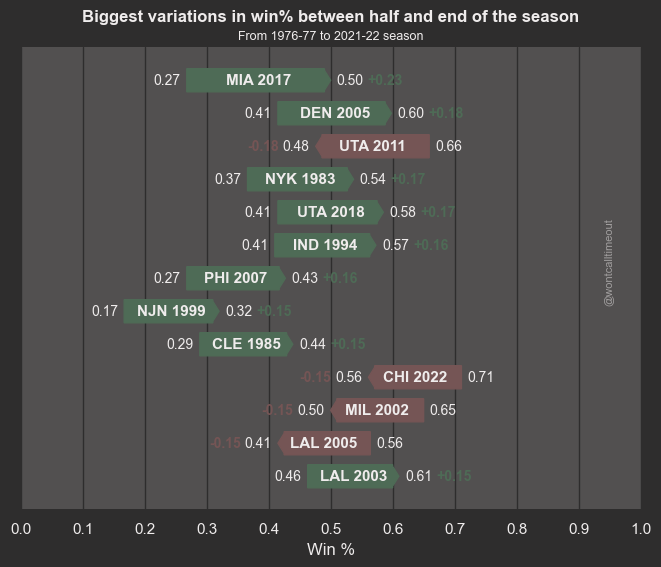

In [284]:
col = 'Win %'
sorted_dataframe = all_years_data.sort_values(by=f'{col}{delta_suffix}', ascending=False, key=abs) #.head(top_n)
sorted_dataframe = all_years_data[all_years_data[f'{col}{delta_suffix}'].abs() > quantile_99]
plot_variations_wl(
    sorted_dataframe,
    f'{col}{suffixes[0]}',
    f'{col}{suffixes[1]}',
    f'{col}{delta_suffix}',
    top_n,
    dark_theme=True
)

99% of the time, a team's winning percentage at the end of the season is equal to the mid-season percentage ± 14pp. Here are the 13 teams that defied the odds. ⤵️

📈 Biggest uplift : In 2016-17, the Miami Heat had lost both Wade and Bosh. The team got off to an 11–30 start before they went 30–11. A crazy rally... only to be eliminated after the last game of the season.

📉 Biggest downlift : In 2011, around the All-Star game, the 4th-seed Jazz traded lead scorer and passer (22-10) Deron Williams shortly after head coach Jerry Sloan resigned. The Jazz became the first team in NBA history to start 27–13 and fail to make the playoffs. 

Variations in win% and standings can be loosely correlated. Last year, Boston made a big leap from 10th to 3rd seed but their win% changed by 0.13pp only.

For the nerds... Here is the distribution of variations in winning percentage for all 1260 seasons.


<Figure size 800x1200 with 0 Axes>

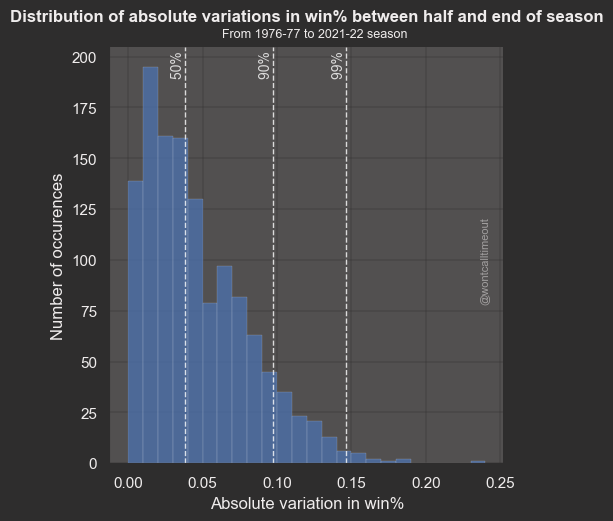

In [285]:
title = 'Distribution of absolute variations in win% between half and end of season'

font_color = '#efecec'
grid_background_color = '#525050'
chart_background_color = '#2e2d2d'

pyplot.figure(figsize=(8, 12))

seaborn.set(
    rc={
        'axes.facecolor':grid_background_color,
        'figure.facecolor':chart_background_color,
        'axes.labelcolor': font_color,
        'axes.edgecolor': chart_background_color,
        'text.color': font_color,
        'xtick.color': font_color,
        'ytick.color': font_color,
        'grid.color': chart_background_color,
        'grid.linewidth': 0.3,
        'axes.grid': True,
        'axes.linewidth': 0.1,
        'patch.linewidth':0.1,
    }
)

plot = seaborn.displot(
    all_years_data, x="Abs. win % variation", binwidth=0.01, kde=False,
)

'''
plot.set_titles(
    f'{title}\n',
    fontsize=12,
    fontweight='bold',
)
plot.set_xlabels('hey')
plot.set_ylabels('you')
'''

quantiles_color = 'white'

pyplot.title(
    f'{title}\n',
    fontsize=12,
    fontweight='bold',
)

pyplot.xlabel(
    'Absolute variation in win%'
)
pyplot.ylabel(
    'Number of occurences'
)


# Range
pyplot.text(
    0.125,
    214,
    'From 1976-77 to 2021-22 season',
    fontsize=9,
    horizontalalignment = 'center',
    verticalalignment = 'top',
    color=font_color
)


pyplot.axvline(x=quantile_50, color=quantiles_color, alpha=0.8, ls='--', linewidth=1)
pyplot.axvline(x=quantile_90, color=quantiles_color, alpha=0.8, ls='--', linewidth=1)
pyplot.axvline(x=quantile_99, color=quantiles_color, alpha=0.8, ls='--', linewidth=1)
pyplot.text(
    quantile_50,
    205,
    '50% ',
    fontsize=10,
    horizontalalignment = 'right',
    verticalalignment = 'top',
    rotation=90,
    color=quantiles_color,
    alpha=0.8,
) 
pyplot.text(
    quantile_90,
    205,
    '90% ',
    fontsize=10,
    horizontalalignment = 'right',
    verticalalignment = 'top',
    rotation=90,
    color=quantiles_color,
    alpha=0.8,
) 
pyplot.text(
    quantile_99,
    205,
    '99% ',
    fontsize=10,
    horizontalalignment = 'right',
    verticalalignment = 'top',
    rotation=90,
    color=quantiles_color,
    alpha=0.8,
) 
#watermark
pyplot.text(
    0.24,
    100,
    '@wontcalltimeout',
    fontsize=8,
    horizontalalignment = 'center',
    verticalalignment = 'center',
    rotation=90,
    color=font_color,
    alpha=0.5,
)
pyplot.savefig(f'data/{title}.png')
pyplot.show()


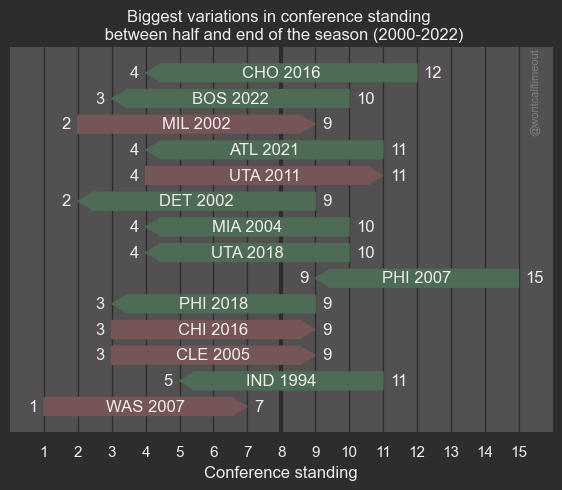

In [230]:
col = 'Conference standing'
top_n = 14
sorted_dataframe = all_years_data.sort_values(by=f'{col}{delta_suffix}', ascending=False, key=abs).head(top_n)
plot_variations_standings(sorted_dataframe, f'{col}{suffixes[0]}', f'{col}{suffixes[1]}', f'{col}{delta_suffix}', top_n)